# **Brain Tumour Classification**
Our project’s aim is to classify the brain tumours in the given dataset with as high an accuracy rate as possible. We use three artificial intelligence methods, namely the k-Nearest Neighbours Algorithm (KNN), Logistic Regression, and Convolutional Neural Network (CNN), to attempt to explore ways to find the most accurate and precise method for the classification of brain tumours in the dataset. 


# **Articles of Interest**
### Logistic Regression
Saidani, O., Aljrees, T., Umer, M., Alturki, N., Alshardan, A., Khan, S. W., Alsubai, S., & Ashraf, I. (2023). Enhancing prediction of brain tumor classification using images and numerical data features. Diagnostics, 13(15), 2544. https://doi.org/10.3390/diagnostics13152544

The article mentioned that it is crucial to have proper selection and fine-tuning of the parameters for the classifier. To address this, we adopted a grid search technique to explore the hyperparameter space effectively. Though time consuming, we are able to obtain the most suitable hyperparameters for the Logistic Regression classifier.
### K-Nearest Neighbour
Saeed, S., Abdullah, A., Jhanjhi, N.Z. et al. New techniques for efficiently k-NN algorithm for brain tumor detection. Multimed Tools Appl 81, 18595–18616 (2022). https://doi.org/10.1007/s11042-022-12271-x

One limitation that the referred work faced was the issue of high-dimensional segmentation, which affects the accuracy of the model.To address this, we perform dimensionality reduction by reducing the numbers of features or variables in the data, which is done by 
process the images in grey scale and hard their constrasts enhanced to enhance visibility of the key features. Removal of Black Padding will allowbetter focus on relevant features to determine the significant factors.

### Convolutional Neural Network (CNN)
ZainEldin, H., Gamel, S. A., El-Kenawy, E. M., Alharbi, A. H., Khafaga, D. S., Ibrahim, A., & Talaat, F. M. (2022). Brain tumour detection and classification using deep learning and Sine-Cosine Fitness Grey Wolf optimization. Bioengineering, 10(1), 18. https://doi.org/10.3390/bioengineering10010018

The proposed algorithm's long processing time, which is primarily due to the additional optimisation steps, is a limitation. This aspect may limit its applicability, especially when dealing with limited training data. It may not be efficient or appropriate for real-world applications that require both processing speed and data utilisation efficiency. To address the long processing time problem, we can consider using less computationally demanding optimisation techniques that strike a better balance between speed and data utilisation. Removing some of the optimisation steps may also help, especially since our goal is not just high accuracy but to control both false positives and false negatives.



# **Code References**
https://www.tensorflow.org/tutorials/images/transfer_learning#use_data_augmentation

https://www.tensorflow.org/tutorials/keras/keras_tuner



# Libraries
### Install Libraries

In [1]:
"""
!pip install --upgrade scikit-learn
!pip install tensorflow opencv-python matplotlib
!pip install pydot
!pip install -q -U keras-tuner
!pip install pillow
!pip install -U scikit-learn
!pip install seaborn
""" 

'\n!pip install --upgrade scikit-learn\n!pip install tensorflow opencv-python matplotlib\n!pip install pydot\n!pip install -q -U keras-tuner\n!pip install pillow\n!pip install -U scikit-learn\n!pip install seaborn\n'

### Import Libraries

In [2]:
import numpy as np
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import keras_tuner as kt
import cv2
import random

from PIL import Image
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, make_scorer
from sklearn.metrics import roc_curve, auc
from statistics import mean

Using TensorFlow backend


# **Data Processing**
For KNN and Logisitic regression use the cod beow. However for CNN, the model itself process the data hence CNN will use the original dataset. We have made the pixel size to be the same for all three models though.

The data has already been processed using the code below. The processed data is found in the `cleaned_data` folder.

In [3]:
### Loading of original images as greyscale
benign_files = os.listdir("./dataset/data/benign")
malignant_files = os.listdir("./dataset/data/malignant")
rootpath = "./dataset/data"

benign_og_image = []
malignant_og_image = []

for i in benign_files:
    image = cv2.imread(f'{rootpath}/benign/{i}', cv2.IMREAD_GRAYSCALE)
    benign_og_image.append(image)

for i in malignant_files:
    image = cv2.imread(f'{rootpath}/malignant/{i}', cv2.IMREAD_GRAYSCALE)
    malignant_og_image.append(image)

### Function to crop images, removing black padding
def crop(images):

    croppedList = []

    for i in images:
        # Enhances the contrast of the greyscaled image
        imageEqualize = cv2.equalizeHist(i)
        # Separate foreground and background of an image based on pixel intensities
        _, imageThresh = cv2.threshold(imageEqualize, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        # Obtain the contours in the image. Each countour is represented as a list of points, where each point is represented as a tuple
        imageContour, _ = cv2.findContours(imageThresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        # Obtain the contour with the largest contour area
        largestContour = max(imageContour, key=cv2.contourArea)
        # Construct a bounding rectangle that captures this countour.
        # The bounding rectangle is represented by the top-left x-y coordinates, its width and its height
        x, y, w, h = cv2.boundingRect(largestContour)
        # Crop the image based on the coordinates and dimensions of the bounding rectangle
        cropped = i[y:y+h, x:x+w]
        croppedList.append(cropped)
    
    return croppedList

### Function to resize images to 224x224
def resize(images):

    resizeList = []

    for i in images:
        # Resizing image to size 224x224
        resized = cv2.resize(i, (224,224))
        resizeList.append(resized)

    return resizeList


### Uncomment first/second chunk to save benign/malignant images respectively
### Benign
"""
croppedBenign = crop(benign_og_image)
cleanedBenign = resize(croppedBenign)
for i,j in zip(cleanedBenign,benign_files):
    cv2.imwrite(f"./dataset/cleaned_data/benign/{j}_cleaned.jpg", i)
"""

### Malignant
"""
croppedMalignant = crop(malignant_og_image)
cleanedMalignant = resize(croppedMalignant)
for i,j in zip(cleanedMalignant,malignant_files):
    cv2.imwrite(f"./dataset//cleaned_data/malignant/{j}_cleaned.jpg", i)
"""

'\ncroppedMalignant = crop(malignant_og_image)\ncleanedMalignant = resize(croppedMalignant)\nfor i,j in zip(cleanedMalignant,malignant_files):\n    cv2.imwrite(f"./dataset//cleaned_data/malignant/{j}_cleaned.jpg", i)\n'

After cleaning the data we can start creating the models.

# **Logisitic Regression**

Logistic regression is a statistical method used for binary classification problems, where the target variable has two possible outcomes. This classifier is suitable for this task, classification of benign/malignant brain tumours.

## **Data Processing**

### Loading Data from directory
Load all cleaned images and normalising the dataset

In [4]:
benign_files = os.listdir("./dataset/cleaned_data/benign")
malignant_files = os.listdir("./dataset/cleaned_data/malignant")

X = []
y = []

for i in benign_files:
    
    image = cv2.imread(f'./dataset/cleaned_data/benign/{i}', cv2.IMREAD_GRAYSCALE) # Images loaded as greyscale images
    X.append(image.flatten()) # Flattening array into a 1D Array
    y.append(0) # Benign takes value of 0

for i in malignant_files:
    
    image = cv2.imread(f'./dataset/cleaned_data/malignant/{i}', cv2.IMREAD_GRAYSCALE) # Images loaded as greyscale images
    X.append(image.flatten()) # Flattening array into a 1D Array
    y.append(1) # Malignant takes value of 1

scaler = MinMaxScaler()
X_norm = scaler.fit_transform(X) # Normalising the dataset

## **Building classifier**

In [5]:
# A parameter grid using the defined cross validation and possible parameters
classifier = LogisticRegression(C=10, max_iter=100, penalty='l1', solver='liblinear')

### Finding ideal hyperparameters (Long Run-time)
Comment `%%script` false to not skip this code block

In [6]:
%%script false
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=41) # Split the dataset into train and testing

param_grid = {
    'penalty': ['l1', 'l2', 'none'], 
    'C': [0.001, 0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'],
    'max_iter': [100, 500, 1000]
} # Dictionary of possible parameter values for each parameter

score = make_scorer(recall_score) # Creating scoring metric based on recall score

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=41) # Defining cross validation

# A parameter grid using the defined cross validation and possible parameters
grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=cv)
# Fitting the parameter grid with the training data
grid_search.fit(X_train, y_train)

# Retrieve the best parameters that will maximise recall score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(best_params)
print(best_score)

Couldn't find program: 'false'


Conclusion: Best parameters are C=10, max_iter=100, penalty='l1', solver='liblinear'
### Finding ideal threshold value
Obtain threshold value which maximises AUC of ROC

In [7]:
threshold_all = []

for i in range(100):

    # Split data set into testing and training sets using various random seeds
    X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=i)

    # Fit the model with training set data
    classifier.fit(X_train, y_train)
    # Obtain the predicted values using test input data
    probs = classifier.predict_proba(X_test)[:,1]

    # Plot ROC curve using the predicted values and actual values
    fpr, tpr, thresholds = roc_curve(y_test, probs)

    # Obtain the threshold value that maximises AUC value
    best = thresholds[np.argmax(tpr-fpr)]

    threshold_all.append(best)

threshold_best = mean(threshold_all)

print(threshold_best)

0.7110732428871077


Conclusion: Threshold value that maximises AUC is approximately 0.7

## **Testing**

In [8]:
# Creating N-Fold Cross Validation method, number of folds being 5
snf = StratifiedKFold(n_splits=5, shuffle=True, random_state=41)

# Evaluate the model on its average accuracy, average recall score, and average ROC-AUC value
avg_acc = mean(cross_val_score(classifier, X_norm, y, cv=snf, scoring="accuracy"))
avg_recall = mean(cross_val_score(classifier, X_norm, y, cv=snf, scoring="recall"))
avg_auc = mean(cross_val_score(classifier, X_norm, y, cv=snf, scoring="roc_auc"))

print(avg_acc)
print(avg_recall)
print(avg_auc)

0.7615171137835338
0.8634408602150537
0.7835080645161291


Average recall score found to be 0.85, whereas average accuracy found to be 0.75

# **K-Nearest Neighbour**
## **Data Processing**
### Generating Image Dataset
Load all images and normalize the dataset.

In [9]:
benign_arrlist = []  # List for storing benign images
malignant_arrlist = []  # List for storing malignant images

benign_dir = 'dataset/cleaned_data/benign/'
for filename in os.listdir(benign_dir):
    if filename.endswith(".jpg"):
        file_path = os.path.join(benign_dir, filename)
        bim = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)  # Read the image as grayscale
        benign_arrlist.append(bim / 255.0)  # Normalize the pixel values to the range [0, 1]

malignant_dir = 'dataset/cleaned_data/malignant/'
for filename in os.listdir(malignant_dir):
    if filename.endswith(".jpg"):
        file_path = os.path.join(malignant_dir, filename)
        mim = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)  # Read the image as grayscale
        malignant_arrlist.append(mim / 255.0) # Normalize the pixel values to the range [0, 1]
                
X_benign = np.array(benign_arrlist) 
y_benign = np.zeros(X_benign.shape[0]) # Labelling all benign as 0

X_malignant = np.array(malignant_arrlist) 
y_malignant = np.ones(X_malignant.shape[0]) # Labelling all malignant as 1

X = np.concatenate((X_benign, X_malignant), axis=0)
y = np.concatenate((y_benign, y_malignant), axis=0)

X_flat = np.concatenate((X_benign.reshape(X_benign.shape[0], -1), X_malignant.reshape(X_malignant.shape[0], -1)), axis=0)

### Splitting the Dataset

In [10]:
#Initialising the random seeds
random_state = np.random.randint(0, 1000)

# Split the data into training and testing sets, with ratio of 80:20
X_train, X_test, y_train, y_test = train_test_split(X_flat, y, test_size=0.2, random_state = random_state)

## **KNN Model**
### Initalizing the KNN Model

In [11]:
n_splits = 10 # Doing a 10-Fold Cross-Validation
kf = KFold(n_splits=n_splits, shuffle=True, random_state = random_state)

# Store the accuracy scores for k values, using N-Fold Validation
k_accuracy_scores = {}

# Iterate over different values of k, using odd numbers to prevent tiebreaker scenarios

for k in range(3, 21, 2): 
    random.seed()
    accuracy_scores = []
    for train_index, test_index in kf.split(X_train):
        X_train_fold, X_val_fold = X_train[train_index], X_train[test_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[test_index]

        # Initialize the KNN model
        knn_model = KNeighborsClassifier(n_neighbors=k)

        # Fit the model on the training data
        knn_model.fit(X_train_fold, y_train_fold)

        # Make predictions on the validation data
        y_pred = knn_model.predict(X_val_fold)

        # Calculate and store the accuracy of the model for each fold
        accuracy = accuracy_score(y_val_fold, y_pred)
        accuracy_scores.append(accuracy)

    # Store the averaged accuracy for the current k
    k_accuracy_scores[k] = sum(accuracy_scores) / len(accuracy_scores)

# Find the best k with the highest accuracy
best_k = max(k_accuracy_scores, key=k_accuracy_scores.get)
best_accuracy = k_accuracy_scores[best_k]
print("Best k value:", best_k)
print("Best accuracy:", best_accuracy)

Best k value: 11
Best accuracy: 0.6643274853801169


### Plot the accuracy scores for different k values

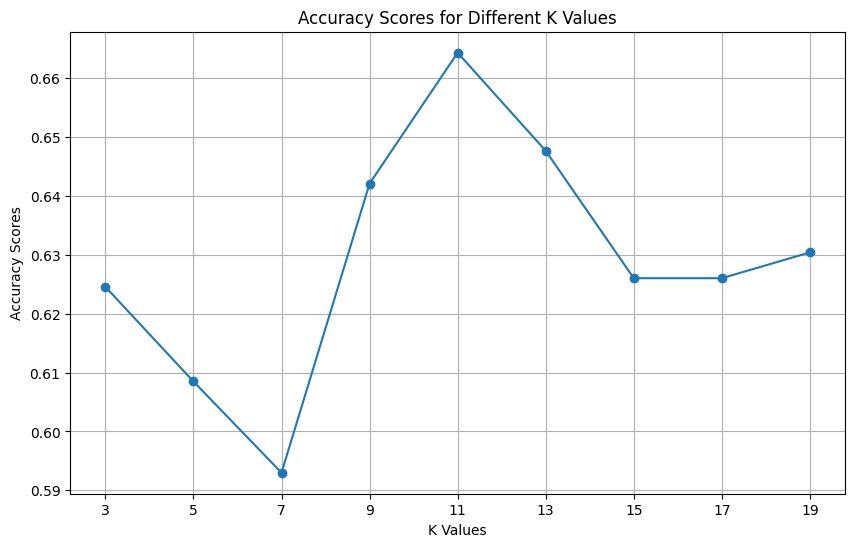

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(list(k_accuracy_scores.keys()), list(k_accuracy_scores.values()), marker='o')
plt.title('Accuracy Scores for Different K Values')
plt.xlabel('K Values')
plt.ylabel('Accuracy Scores')
plt.xticks(list(k_accuracy_scores.keys()))
plt.grid()
plt.show()

### Using Optimal threshold to minimise errors
Using optimal K, find optimal threshold to minimise errors, taking into consideration that False Positive Rate (FPR) is tolerable but False Negative Rate (FNR) is not due to the context of brain tumour detection.

In [13]:
best_k = 13 
# Best average k after many iterations. Due to random seeding, a single optimal k cannot be decided as 
# each iteration results in different best k. If you want to use the code calculated K, comment the best_k line above, but note of the randomness due to random seeds each run.

# Store the recall scores, TPR, and FNR for different threshold values optimal k value found previous
threshold_recall_scores = {}
threshold_tpr = {}
threshold_fnr = {}
threshold_fpr = {}
threshold_tnr = {}

# Loop through different threshold values
for threshold in np.arange(0, 1, 0.1):
    recall_scores = []
    true_positives = []
    false_negatives = []
    false_positives = []
    true_negatives = []
    for train_index, test_index in kf.split(X_train):
        X_train_fold, X_val_fold = X_train[train_index], X_train[test_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[test_index]

        # Initialize the KNN model with the current value of k
        knn_model = KNeighborsClassifier(n_neighbors=best_k)

        # Fit the model on the training data
        knn_model.fit(X_train_fold, y_train_fold)

        # Flatten the validation data
        X_val_fold_flat = X_val_fold.reshape(X_val_fold.shape[0], -1)

        # Make predictions on the validation data
        y_pred_prob = knn_model.predict_proba(X_val_fold_flat)[:, 1]  # Probability of the positive class
        y_pred = (y_pred_prob > threshold).astype(int)

        # Calculate and store the recall, TPR, and FNR of the model for each fold
        recall = recall_score(y_val_fold, y_pred)
        recall_scores.append(recall)

        tn, fp, fn, tp = confusion_matrix(y_val_fold, y_pred).ravel()
        tpr = tp / (tp + fn)  # True Positive Rate
        fnr = fn / (fn + tp)  # False Negative Rate
        fpr = fp / (fp + tn)  # False Positive Rate
        tnr = tn / (tn + fp)  # True Negative Rate

        true_positives.append(tpr)
        false_negatives.append(fnr)
        false_positives.append(fpr)
        true_negatives.append(tnr)

    # Calculate the averaged recall, TPR, and FNR for the current threshold
    average_recall = sum(recall_scores) / len(recall_scores)
    average_tpr = sum(true_positives) / len(true_positives)
    average_fnr = sum(false_negatives) / len(false_negatives)
    average_fpr = sum(false_positives) / len(false_positives)
    average_tnr = sum(true_negatives) / len(true_negatives)

    threshold_recall_scores[threshold] = average_recall
    threshold_tpr[threshold] = average_tpr
    threshold_fnr[threshold] = average_fnr
    threshold_fpr[threshold] = average_fpr
    threshold_tnr[threshold] = average_tnr


### Recall scores, TPR, FNR, and FPR for different threshold values

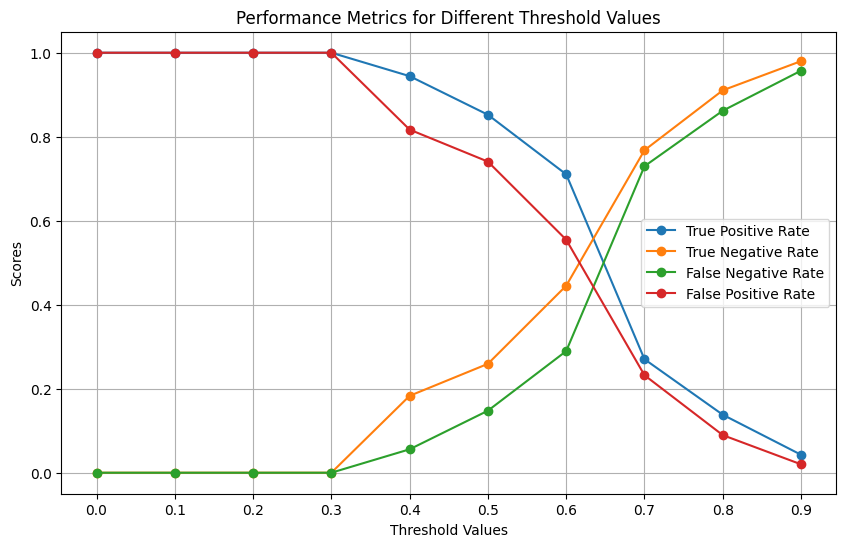

In [14]:
#We will observe for threshold that maximise of TPR & FPR and minimise FPR and FNR. For our context of brain tumour classification, we will not tolerate FNR while FPR is tolerable.
#Note that low threshold value such as threshold = 0 is not considered optimal despite the graph, as threshold = 0 will mean that every point is marked as 'positive' hence the perfect accuuracy
plt.figure(figsize=(10, 6))
plt.plot(list(threshold_tpr.keys()), list(threshold_tpr.values()), marker='o', label='True Positive Rate')
plt.plot(list(threshold_fpr.keys()), list(threshold_tnr.values()), marker='o', label='True Negative Rate')
plt.plot(list(threshold_fnr.keys()), list(threshold_fnr.values()), marker='o', label='False Negative Rate')
plt.plot(list(threshold_fpr.keys()), list(threshold_fpr.values()), marker='o', label='False Positive Rate')
plt.title('Performance Metrics for Different Threshold Values')
plt.xlabel('Threshold Values')
plt.ylabel('Scores')
plt.xticks(np.arange(0, 1, 0.1))
plt.legend()
plt.grid()
plt.show()

## **Re-run KNN algorithm with the best_k and best_threshold values**

In [15]:
best_threshold = 0.5 #Obtaining best threshold using info from the previous graphs, assuming that K=13
# If you use other best_k value, please look at the graph and select the best threshold which fit by reassigning the value to best_threshold

# Flatten the benign and malignant datasets
X_benign_flat = X_benign.reshape(X_benign.shape[0], -1)
X_malignant_flat = X_malignant.reshape(X_malignant.shape[0], -1)

# Concatenate the flattened benign and malignant datasets
X = np.concatenate((X_benign_flat, X_malignant_flat), axis=0)
y = np.concatenate((y_benign, y_malignant), axis=0)

# Re-run the KNN algorithm with the best_k and best_threshold values using the entire dataset to test over accuracy.
random_state_knn = np.random.randint(0, 1000)  # Generate a random seed for KNN
np.random.seed(random_state_knn) # Setting the random seed
knn_model = KNeighborsClassifier(n_neighbors=best_k)
knn_model.fit(X, y)  # Using the entire dataset for training


KNeighborsClassifier(n_neighbors=13)

## **Testing**
### Getting the evaluation scores

In [16]:
# Make predictions on the data using the best_threshold
y_pred_prob = knn_model.predict_proba(X)[:, 1]  # Probability of the positive class
y_pred = (y_pred_prob > best_threshold).astype(int)

# Calculate the elements of the confusion matrix
conf_matrix = confusion_matrix(y, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()

# Calculate evaluation scores using TP, FP, FN, TN
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1 = 2 * (precision * recall) / (precision + recall)

# Print the evaluation scores
print(f"Evaluation metrics for k={best_k} and threshold = {best_threshold}:")
print(f"Accuracy: {accuracy:.5f}")
print(f"Precision: {precision:.5f}")
print(f"Recall: {recall:.5f}")
print(f"F1 Score: {f1:.5f}")

Evaluation metrics for k=13 and threshold = 0.5:
Accuracy: 0.74892
Precision: 0.76966
Recall: 0.88961
F1 Score: 0.82530


### Confusion Matrix

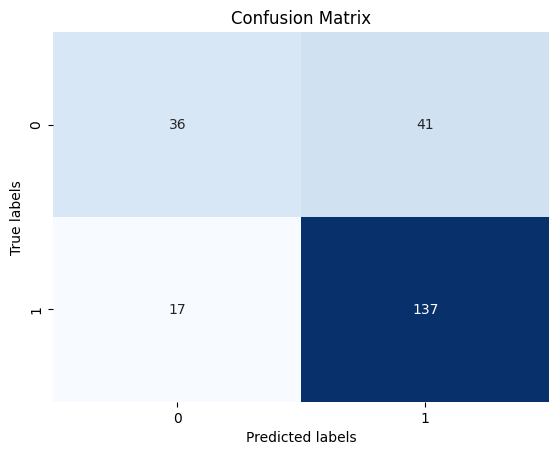

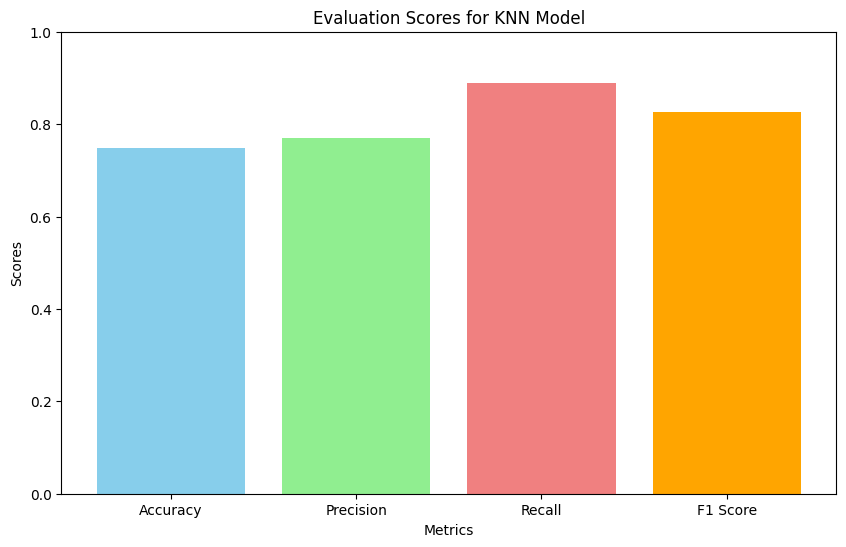

In [17]:
# Create a confusion matrix and plot it
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Define evaluation scores and labels
scores = [accuracy, precision, recall, f1]
score_labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Create a histogram
plt.figure(figsize=(10, 6))
plt.bar(score_labels, scores, color=['skyblue', 'lightgreen', 'lightcoral', 'orange'])
plt.title('Evaluation Scores for KNN Model')
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.ylim(0, 1.0)
plt.show()

### Test accuracy for varying split test ratios

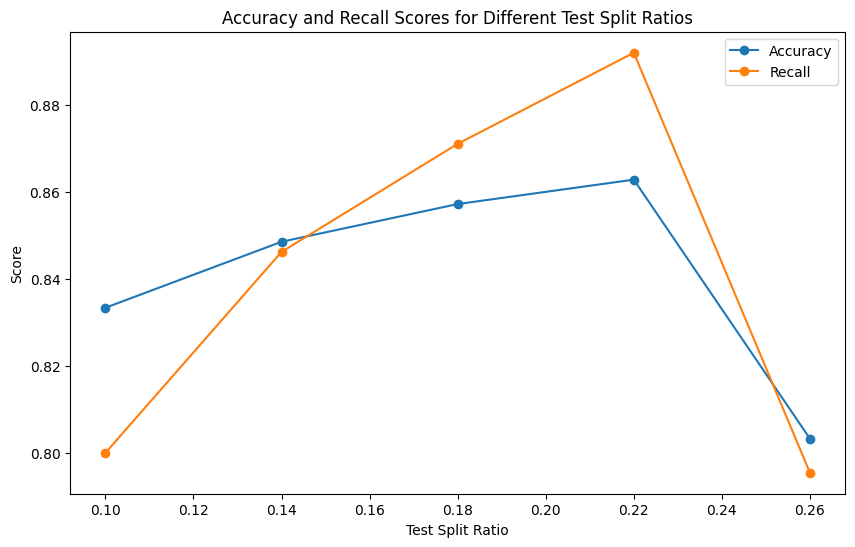

In [18]:
# Define the values of k to be tested
k_values = [3, 5, 7, 9, 11, 13, 15, 17, 19]

def test_split_ratios(X, y, n_splits, k_values, test_split_range):
    accuracy_scores = []
    recall_scores = []
    split_ratios = []

    for test_split_ratio in np.arange(*test_split_range):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_split_ratio, random_state=0)
        kf = KFold(n_splits=n_splits, shuffle=True, random_state=0)

        k_accuracy_scores = {}

        for k in k_values:
            accuracy_scores_fold = []
            recall_scores_fold = []
            for train_index, test_index in kf.split(X_train):
                X_train_fold, X_val_fold = X_train[train_index], X_train[test_index]
                y_train_fold, y_val_fold = y_train[train_index], y_train[test_index]

                knn_model = KNeighborsClassifier(n_neighbors=k)
                knn_model.fit(X_train_fold, y_train_fold)
                y_pred = knn_model.predict(X_val_fold)

                accuracy = accuracy_score(y_val_fold, y_pred)
                recall = recall_score(y_val_fold, y_pred)
                accuracy_scores_fold.append(accuracy)
                recall_scores_fold.append(recall)

            k_accuracy_scores[k] = sum(accuracy_scores_fold) / len(accuracy_scores_fold)
        
        optimal_k = max(k_accuracy_scores, key=k_accuracy_scores.get)
        knn_model = KNeighborsClassifier(n_neighbors=optimal_k)
        knn_model.fit(X, y)
        y_pred = knn_model.predict(X_test)
        overall_accuracy = accuracy_score(y_test, y_pred)
        overall_recall = recall_score(y_test, y_pred)

        accuracy_scores.append(overall_accuracy)
        recall_scores.append(overall_recall)
        split_ratios.append(test_split_ratio)

    plt.figure(figsize=(10, 6))
    plt.plot(split_ratios, accuracy_scores, marker='o', label='Accuracy')
    plt.plot(split_ratios, recall_scores, marker='o', label='Recall')
    plt.xlabel('Test Split Ratio')
    plt.ylabel('Score')
    plt.title('Accuracy and Recall Scores for Different Test Split Ratios')
    plt.legend()
    plt.show()

# Assuming you have already defined X_flat, y, n_splits, and test_split_range
test_split_ratios(X_flat, y, n_splits, k_values, (0.1, 0.3, 0.04))

### Testing Cleaned vs Uncleaned Data. The code here loads in ORIGINAL IMAGES with no cleaning/normalisation etc.

In [19]:
# Please ensure local dataset is the ORIGINAL uncleaned dataset before testing
# In the report we ran 2 cases, 1st is letting the original images find its own optimal K. 2nd is using the cleaned dataset determined best_k = 13. We compare the accuracy and recall score for
# both cases of original VS cleaned data.

benign_arrlist = []  # List for storing benign images
malignant_arrlist = []  # List for storing malignant images

benign_dir = 'dataset/data/benign/'
for filename in os.listdir(benign_dir):
    if filename.endswith(".jpg"):
        file_path = os.path.join(benign_dir, filename)
        bim = cv2.imread(file_path)  # Read the image without any preprocessing
        bim = cv2.resize(bim, (244, 244))  # Resize the image to a specific shape
        benign_arrlist.append(bim)  # Append the resized image

malignant_dir = 'dataset/data/malignant/'
for filename in os.listdir(malignant_dir):
    if filename.endswith(".jpg"):
        file_path = os.path.join(malignant_dir, filename)
        mim = cv2.imread(file_path)  # Read the image without any preprocessing
        mim = cv2.resize(mim, (244, 244))  # Resize the image to a specific shape
        malignant_arrlist.append(mim)  # Append the resized image
        
X_benign = np.array(benign_arrlist)
y_benign = np.zeros(X_benign.shape[0]) 

X_malignant = np.array(malignant_arrlist)
y_malignant = np.ones(X_malignant.shape[0])  

X = np.concatenate((X_benign, X_malignant), axis=0)
y = np.concatenate((y_benign, y_malignant), axis=0)

X_flat = np.concatenate((X_benign.reshape(X_benign.shape[0], -1), X_malignant.reshape(X_malignant.shape[0], -1)), axis=0)

#Initialising the random seeds
random_state = np.random.randint(0, 1000)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_flat, y, test_size=0.2, random_state = random_state)

n_splits = 10
kf = KFold(n_splits=n_splits, shuffle=True, random_state = random_state)

# Store the accuracy scores for k values, using N-Fold Validation
k_accuracy_scores = {}

# Iterate over different values of k, using odd numbers to prevent tiebreaker scenarios

for k in range(3, 21, 2): 
    random.seed()
    accuracy_scores = []
    for train_index, test_index in kf.split(X_train):
        X_train_fold, X_val_fold = X_train[train_index], X_train[test_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[test_index]

        # Initialize the KNN model
        knn_model = KNeighborsClassifier(n_neighbors=k)

        # Fit the model on the training data
        knn_model.fit(X_train_fold, y_train_fold)

        # Make predictions on the validation data
        y_pred = knn_model.predict(X_val_fold)

        # Calculate and store the accuracy of the model for each fold
        accuracy = accuracy_score(y_val_fold, y_pred)
        accuracy_scores.append(accuracy)

    # Store the averaged accuracy for the current k
    k_accuracy_scores[k] = sum(accuracy_scores) / len(accuracy_scores)

# Find the best k with the highest accuracy
best_k = max(k_accuracy_scores, key=k_accuracy_scores.get)
best_accuracy = k_accuracy_scores[best_k]
print("Best k value:", best_k)
print("Best accuracy:", best_accuracy)

# Run KNN on the whole dataset using the best K value
knn_model = KNeighborsClassifier(n_neighbors=13)
knn_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_prob = knn_model.predict_proba(X_test)[:, 1]  # Probability of the positive class
y_pred = (y_pred_prob > 0.5).astype(int)  # Using threshold of 0.5

# Compute accuracy and recall score
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy on test set:", accuracy)
print("Recall on test set:", recall)

Best k value: 17
Best accuracy: 0.7505847953216374
Accuracy on test set: 0.6170212765957447
Recall on test set: 0.65625



# **Convolutional Neural Network (CNN)**

## **Data Processing**
As stated above, CNN has its own process for images hence we will use the original data.

In [20]:
data_directory = 'dataset/data'
BATCH_SIZE = 32
IMG_SIZE = (224, 224) 


train_dataset = tf.keras.utils.image_dataset_from_directory(data_directory, 
                                                      shuffle=True,
                                                      seed=100, 
                                                      image_size=IMG_SIZE,
                                                      batch_size=BATCH_SIZE)
# Load images from directory to form dataset
# Images will be resized to a width of 224 pixels and height of 224 pixels if they are not already of the specified dimensions
# Batch Size determines how many images are included in each batch of the dataset during training. 
class_names = train_dataset.class_names

Found 231 files belonging to 2 classes.


### Splitting Dataset
After generating our dataset, we need to split our data into train, validate, test datasets. We decided to go with a 60:20:20 split. Due to a small dataset, we need to ensure there is enough data for both validate and test dataset.

In [21]:
# Calculate the total size of the dataset
dataset_size = tf.data.experimental.cardinality(train_dataset)
# Calculate the sizes for validation and test datasets
val_size = dataset_size // 5  
test_size = val_size

# Split the dataset into train, validation, and test sets
validation_dataset = train_dataset.take(val_size)
train_dataset = train_dataset.skip(val_size)

test_dataset = train_dataset.take(test_size)
train_dataset = train_dataset.skip(val_size)

# Train: Validation: Test ratio is approximately 60:20:20

### Configuring Dataset for Performance
This tells tensorflow to build the pipeline and optimise by determining the CPU budget to use. This helps to optimise the performance, reducing the time for training.

In [22]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

## **Data Augmentation & Pre-Processing**
### Creating a Data Augmentation Layer
 Data augmentation involves applying various transformations to the original data, creating new variations of the data for training. We can add different kind of transformation to the layer. We use random horizontal flips, random rotations, random zooms, gaussian noise and random contrast for model.

In [23]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal'),  # Horizontal flip
    tf.keras.layers.RandomRotation(0.4),  # Random rotation with a maximum angle of 0.2 radians
    tf.keras.layers.RandomZoom(0.2),  # Random zoom with a maximum factor of 0.2
    tf.keras.layers.GaussianNoise(0.2),  # Adding Gaussian noise with a standard deviation of 0.1
    tf.keras.layers.experimental.preprocessing.RandomContrast(0.2)  # Random contrast adjustment with a maximum factor of 0.2
])

#This will help to effectively generate a larger and more diverse dataset from a smaller original dataset

Example images of data augmentation

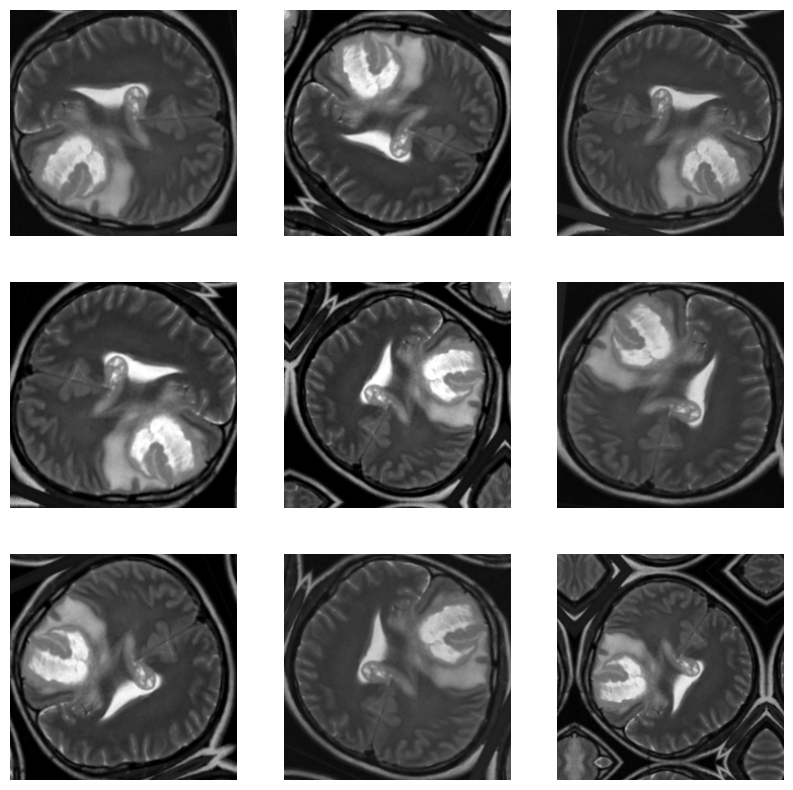

In [24]:
for image, _ in train_dataset.take(1):
  plt.figure(figsize=(10, 10))
  first_image = image[0]
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
    plt.imshow(augmented_image[0] / 255)
    plt.axis('off')

### Rescaling Pixel Values
MobileNetV2 expects pixel values to be in the range of [-1, 1]. As such, we need to rescale the pixel values. The preprocess_input layer, that we will add to the model, will help scale it between the range.

In [25]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

## **Creating the Base Model**
We create the `base_model` from the pre-trained model **MobileNetV2**. By setting the `include_top` argument to False, the loaded pre-trained neural network doesn't include the final classification layers. This is particularly useful as we want to use the network for feature extraction, as it allows for the lower-level features to be learned by the network rather than its high-level classification capabilities.

In [26]:
IMG_SHAPE = IMG_SIZE + (3,) #Adding 3 indicates that the image has three color channels (red, green, and blue).

#Loading the base_model layer
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet') #pre-load with weights trained on ImageNet

### Feature Extraction
We extract features from the images using the pre-trained model (`base_model`). These features can be then used for further processing. 

Prior to compiling and training the model, it's crucial for us to freeze the convolutional base. Freezing, achieved by setting `base_model.trainable = False`, restricts any weight updates within that layer during the training process.

In [27]:
image_batch, label_batch = next(iter(train_dataset))
feature_batch = base_model(image_batch)

base_model.trainable = False #Freeze the convulational base from being trained.
base_model.summary() #View the different layers in the base_model and the number of layers.

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[

Adding a classification head. Using `tf.keras.layers.Dense` layer transforms these extracted features into a single prediction per image.

In [28]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)

prediction_layer = tf.keras.layers.Dense(1, activation = 'sigmoid') 
# The 'sigmoid' activation function is used, which squashes the output to a range of [0, 1], making it suitable for binary classification.
prediction_batch = prediction_layer(feature_batch_average)

We create the model by linking together the data augmentation, rescaling, base model, and feature extraction layers in a sequential manner.

In [29]:
inputs = tf.keras.Input(shape=IMG_SHAPE)  # Defines the input shape for the model, typically for images
x = data_augmentation(inputs)  # Applies data augmentation to the input images to increase dataset size
x = preprocess_input(x)  # Resizes and rescales the augmented images to fit the model
x = base_model(x, training=False)  # Passes the images through the pre-trained model
x = global_average_layer(x)  # Computes the global average pooling of feature maps
x = tf.keras.layers.Dropout(0.3)(x)  # Applies dropout to prevent overfitting
x = tf.keras.layers.BatchNormalization()(x)
outputs = prediction_layer(x)  # Produces model predictions
model = tf.keras.Model(inputs, outputs)  # Defines the complete model architecture

model.summary()  # View the different layers of the CNN model

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 tf.math.truediv (TFOpLambd  (None, 224, 224, 3)       0         
 a)                                                              
                                                                 
 tf.math.subtract (TFOpLamb  (None, 224, 224, 3)       0         
 da)                                                             
                                                                 
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                             

### Visualising the Model
This code creates a image of the flow of the model. If *graphviz* and pydot is not downloaded, keep this commented. 
Uncomment only if *graphviz* and pydot is downloaded to view the image.

In [30]:
#tf.keras.utils.plot_model(model, show_shapes=True)

## **Compiling and Training the CNN Model**
### Compiling the Model
Configures the metrics to be computed during training. In this case, binary accuracy is used, which measures the accuracy of binary classification predictions. The `threshold=0.5` means that the prediction with a probability greater than or equal to 0.5 is considered as the positive class (malignant).

In [31]:
base_learning_rate = 0.0001

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss='binary_crossentropy',
              metrics=[tf.keras.metrics.BinaryAccuracy(threshold=0.5, name='accuracy')])

### Training the Model
Run Model with 10 epochs

In [32]:
initial_epochs = 10
history = model.fit(train_dataset,
                    epochs=initial_epochs,
                    validation_data=validation_dataset)

Epoch 1/10


6/6 [==============================] - 11s 918ms/step - loss: 0.8516 - accuracy: 0.4970 - val_loss: 0.6491 - val_accuracy: 0.6562
Epoch 2/10
6/6 [==============================] - 4s 640ms/step - loss: 0.8295 - accuracy: 0.5210 - val_loss: 0.5313 - val_accuracy: 0.7500
Epoch 3/10
6/6 [==============================] - 4s 649ms/step - loss: 0.8541 - accuracy: 0.5090 - val_loss: 0.5875 - val_accuracy: 0.6562
Epoch 4/10
6/6 [==============================] - 4s 641ms/step - loss: 0.7687 - accuracy: 0.5569 - val_loss: 0.7107 - val_accuracy: 0.5312
Epoch 5/10
6/6 [==============================] - 4s 642ms/step - loss: 0.8085 - accuracy: 0.5389 - val_loss: 0.6359 - val_accuracy: 0.5000
Epoch 6/10
6/6 [==============================] - 4s 641ms/step - loss: 0.7502 - accuracy: 0.5449 - val_loss: 0.6695 - val_accuracy: 0.5938
Epoch 7/10
6/6 [==============================] - 4s 646ms/step - loss: 0.7906 - accuracy: 0.5090 - val_loss: 0.6994 - val_accuracy: 0.5625
Epoch 8/10
6/6 [==============

### Visualising the Accuracy and Loss Values

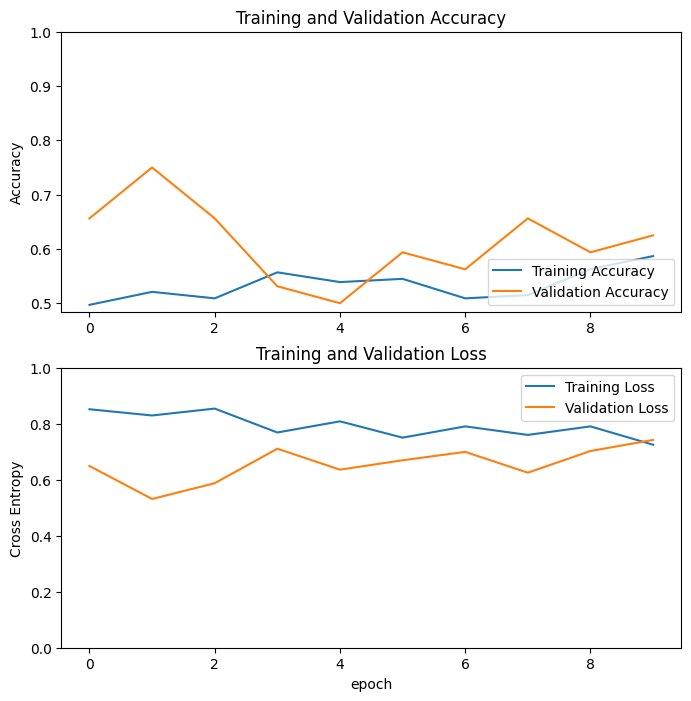

In [33]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

## **Fine-Tuning**
During the ***feature extraction*** process, only a few layers were trained on top of the **MobileNetV2** `base_model`. The weights of the pre-trained network were not updated during the training process. As such, one way we can potentially enhance performance further involves fine-tuning the weights of the top layers of the pre-trained model alongside the training of the added classifier. This process facilitates the transition of weights from generic feature maps to dataset-specific features.
### Un-freeze the Top Layers
We will only fine-tune a limited number of the top layers rather than the entire MobileNet model. By doing so, we can train or our model to be more specific to our dataset but also ensuring generalization to prevent overfitting.

In [34]:
base_model.trainable = True
#Number of layers in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 25
# Range between 100 to 0 layers. Manually adjusted to ensure there was a balance between generalization and specificity.

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable = False

Number of layers in the base model:  154


### Compiling and training the model
We use the same model from the inital training to fine-tune. A lower learning rate is used to prevent overfitting from happening too quickly.

In [35]:
model.compile(loss='binary_crossentropy',
              optimizer = tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate/10), # learning rate =  0.0001
              metrics=[tf.keras.metrics.BinaryAccuracy(threshold=0.5, name='accuracy')])


fine_tune_epochs = 5
# 5 was chosen after manually testing for overfitting
total_epochs =  initial_epochs + fine_tune_epochs
history_fine = model.fit(train_dataset,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1], # Start fine-tuning from the last epoch of the initial training
                         validation_data=validation_dataset)

Epoch 10/15


6/6 [==============================] - 21s 2s/step - loss: 0.6312 - accuracy: 0.6527 - val_loss: 0.7310 - val_accuracy: 0.5938
Epoch 11/15
6/6 [==============================] - 8s 1s/step - loss: 0.6293 - accuracy: 0.6287 - val_loss: 0.6530 - val_accuracy: 0.6562
Epoch 12/15
6/6 [==============================] - 8s 1s/step - loss: 0.5327 - accuracy: 0.7365 - val_loss: 0.4504 - val_accuracy: 0.7812
Epoch 13/15
6/6 [==============================] - 8s 1s/step - loss: 0.5630 - accuracy: 0.7605 - val_loss: 0.4873 - val_accuracy: 0.7188
Epoch 14/15
6/6 [==============================] - 8s 1s/step - loss: 0.4758 - accuracy: 0.7665 - val_loss: 0.5915 - val_accuracy: 0.6562
Epoch 15/15
6/6 [==============================] - 8s 1s/step - loss: 0.4816 - accuracy: 0.7784 - val_loss: 0.3652 - val_accuracy: 0.8438


### Visualising the Accuracy and Loss Values

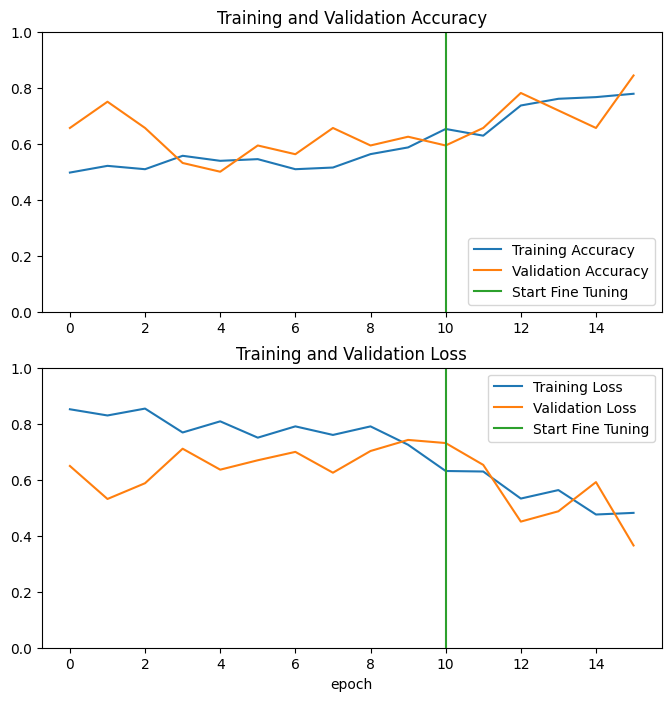

In [36]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0, 1])
plt.plot([initial_epochs,initial_epochs],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([initial_epochs,initial_epochs],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

### Comments on Graph
After ***Fine Tuning***, `accuracy` and `validation accuracy` should increase while `loss` and `validation loss` should decrease. `Validation accuracy` should generally be higher than `accuracy` while `validation loss` should generally be lower than `loss`. THis indicates that there is little overfitting of the training data, which what we want. 

The difference between `accuracy` and `validation accuracy` should decrease while the difference between `loss` and `validation loss` should also decrease after fine-tuning. This indicates that the data is generalizing effectively. It suggest that the model is not overfitting the data, and the performance on unseen data (validation data) is close to the performance on the training data.

We now move on to ***Hyperparameter Tuning***.
### Saving a Copy of the Fine-Tuned Model
Can be ignored. This is used as a checkpoint

In [37]:
model.save('fine_tuned_model.h5')

c:\Users\chrst\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## **Hyperparameter Tuning**
### Hyperparameter Tuning Learning Rate
After ***Fine-Tuning***, we will now find the optimal hyperparameters for our model. We will be focusing on learning rate. We will first create a function that will allow us to test different learning rate values.

In [38]:
def create_model(hp):
    model = tf.keras.models.load_model('fine_tuned_model.h5') #Load the pre-trained fine-tuned model

    # Define hyperparameters to search and their respective search spaces
    learning_rate = hp.Float('learning_rate', min_value=1e-6, max_value=1e-4, sampling='log')
    # Learning rate with a logarithmic search space.
    # This range was chosen as the fine-tuned model already undergoes training. Lower learning rate was needed to prevent overftting

    # Compile the model with the chosen hyperparameters
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), # Optimizer with the chosen learning rate
              loss='binary_crossentropy', 
              metrics=[tf.keras.metrics.BinaryAccuracy(threshold=0.5, name='accuracy')])
    
    return model


### Using HyperBand Tuner to peform hypertuning
We will use Hyperband to tune our model. The model will go through trials and the optimal hyperparameters will be stored. 

In [39]:
tuner = kt.Hyperband(
    create_model,
    objective='val_accuracy', # The objective metric to maximize (validation accuracy)
    max_epochs=10,
    factor=3,
    directory='hyperparameter files', 
    project_name='lr_hyperparam_tuning', #Change name to create new trial datas
    overwrite = False #Set to True if want to overwrite the previous trial results
)

stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3) 
#`stop_early` is used to stop training early after reaching a certain value for the validation loss.

tuner.search(train_dataset, validation_data=validation_dataset, epochs=10, callbacks=[stop_early])

Reloading Tuner from hyperparameter files\lr_hyperparam_tuning\tuner0.json


In [40]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal learning rate for the optimizer is {best_hps.get('learning_rate')}.
""")


The hyperparameter search is complete. The optimal learning rate for the optimizer is 1.1292343734072248e-06.



### Build and retrain hypermodel with the best hyperparameters
After we search for the best hyperparameters, we need retrain our model with those hyperparameter. We also want to find the optimal number of epochs to train the model with the hyperparameters obtained from the search. We first retrain our model and obtain the best epoch base on `validation loss`. After that we can re-instantiate the model with the best epoch.

In [41]:
model = tuner.hypermodel.build(best_hps)
history = model.fit(train_dataset, epochs=20, validation_data=validation_dataset)

val_acc_per_epoch = history.history['val_loss']
best_epoch = val_acc_per_epoch.index(min(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Epoch 1/20
6/6 [==============================] - 26s 2s/step - loss: 0.4430 - accuracy: 0.8084 - val_loss: 0.3992 - val_accuracy: 0.8438
Epoch 2/20
6/6 [==============================] - 8s 1s/step - loss: 0.5072 - accuracy: 0.7485 - val_loss: 0.3999 - val_accuracy: 0.8438
Epoch 3/20
6/6 [==============================] - 8s 1s/step - loss: 0.4847 - accuracy: 0.7545 - val_loss: 0.4728 - val_accuracy: 0.7500
Epoch 4/20
6/6 [==============================] - 8s 1s/step - loss: 0.4463 - accuracy: 0.7784 - val_loss: 0.5230 - val_accuracy: 0.7188
Epoch 5/20
6/6 [==============================] - 8s 1s/step - loss: 0.4361 - accuracy: 0.8323 - val_loss: 0.4164 - val_accuracy: 0.7500
Epoch 6/20
6/6 [==============================] - 8s 1s/step - loss: 0.4840 - accuracy: 0.7425 - val_loss: 0.4911 - val_accuracy: 0.7188
Epoch 7/20
6/6 [==============================] - 9s 1s/step - loss: 0.4329 - accuracy: 0.8263 - val_loss: 0.4056 - val_accuracy: 0.7500
Epoch 8/20
6/6 [========================

In [42]:
hypermodel = tuner.hypermodel.build(best_hps)

# Retrain the model
history = hypermodel.fit(train_dataset, epochs=best_epoch, validation_data=validation_dataset)
hypermodel.save('final_model.h5')

Epoch 1/16
6/6 [==============================] - 27s 2s/step - loss: 0.4645 - accuracy: 0.7964 - val_loss: 0.5038 - val_accuracy: 0.6562
Epoch 2/16
6/6 [==============================] - 8s 1s/step - loss: 0.5041 - accuracy: 0.7605 - val_loss: 0.2569 - val_accuracy: 0.9375
Epoch 3/16
6/6 [==============================] - 8s 1s/step - loss: 0.4856 - accuracy: 0.7186 - val_loss: 0.4179 - val_accuracy: 0.8125
Epoch 4/16
6/6 [==============================] - 8s 1s/step - loss: 0.4433 - accuracy: 0.8263 - val_loss: 0.4657 - val_accuracy: 0.7812
Epoch 5/16
6/6 [==============================] - 9s 1s/step - loss: 0.4604 - accuracy: 0.7605 - val_loss: 0.2848 - val_accuracy: 0.9062
Epoch 6/16
6/6 [==============================] - 8s 1s/step - loss: 0.4772 - accuracy: 0.7605 - val_loss: 0.4210 - val_accuracy: 0.8125
Epoch 7/16
6/6 [==============================] - 8s 1s/step - loss: 0.4182 - accuracy: 0.8024 - val_loss: 0.4111 - val_accuracy: 0.7812
Epoch 8/16
6/6 [========================

### Visualising the Accuracy and Loss Values

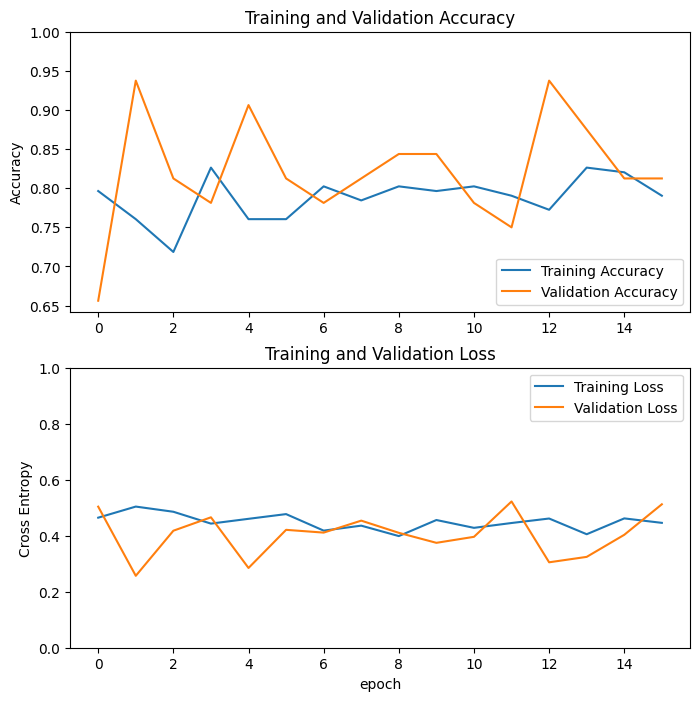

In [43]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

## **Testing**
### Model Accuracy

In [44]:
# Load the saved model
loaded_model = tf.keras.models.load_model('final_model.h5')

# Evaluate the loaded model on the test dataset
loss, accuracy = loaded_model.evaluate(test_dataset)
print('Test accuracy:', accuracy)

1/1 [==============================] - 2s 2s/step - loss: 0.3707 - accuracy: 0.9375
Test accuracy: 0.9375


### Predictions

Predictions:
 [0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1]
Labels:
 [0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 0 0 1]


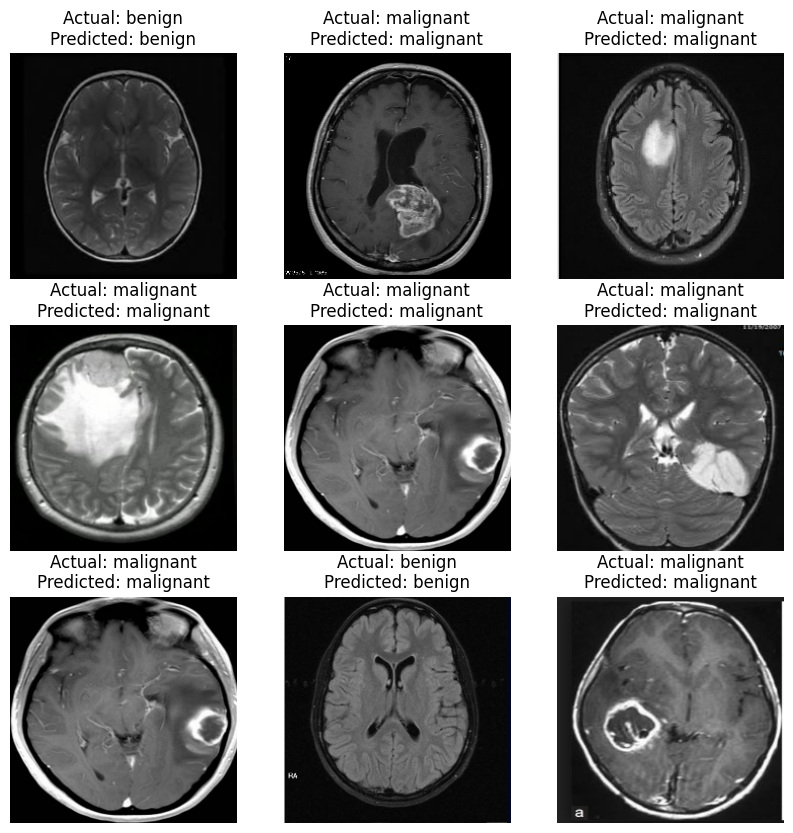

In [45]:
# Retrieve a batch of images from the test set
image_batch, label_batch = test_dataset.as_numpy_iterator().next()
predictions = loaded_model.predict_on_batch(image_batch).flatten()

# Apply a threshold to the model predictions
# If a prediction is less than 0.5, it is set to 0; otherwise, it is set to 1.
predictions = tf.where(predictions < 0.5, 0, 1)

print('Predictions:\n', predictions.numpy())
print('Labels:\n', label_batch)

plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i].astype("uint8"))
  actual_class = class_names[label_batch[i]]
  predicted_class = class_names[predictions[i]]
  title = f"Actual: {actual_class}\nPredicted: {predicted_class}"
  plt.title(title)
  plt.axis("off")

### Confusion Matrix

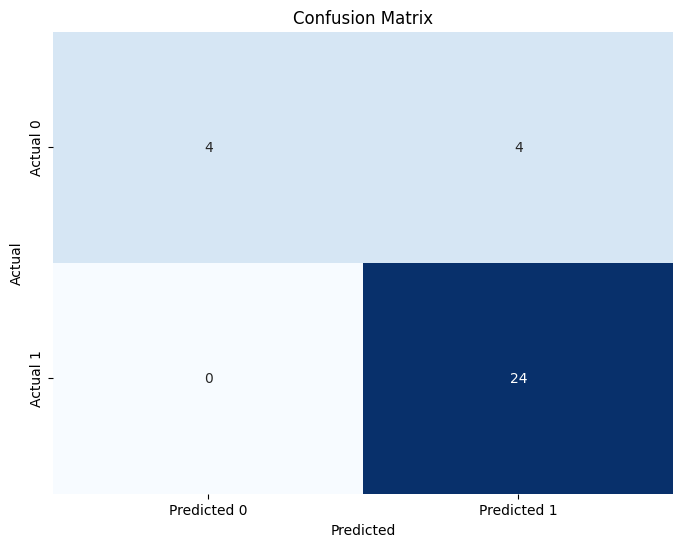

Accuracy: 0.875
False Negative Rate (FNR): 0.0
False Positive Rate (FPR): 0.5
Precision: 0.8571428571428571


In [46]:
# Confusion matrix
confusion = confusion_matrix(label_batch, predictions)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=["Predicted 0", "Predicted 1"], yticklabels=["Actual 0", "Actual 1"])

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Extract TP, TN, FP, and FN from the confusion matrix
tn, fp, fn, tp = confusion.ravel()

# Calculate accuracy
accuracy = (tp + tn) / (tp + tn + fp + fn)

# Calculate False Negative Rate (FNR)
fnr = fn / (fn + tp)

# Calculate False Positive Rate (FPR)
fpr = fp / (fp + tn)

# Calculate precision
precision = tp / (tp + fp)

# Print the results
print("Accuracy:", accuracy)
print("False Negative Rate (FNR):", fnr)
print("False Positive Rate (FPR):", fpr)
print("Precision:", precision)